<a href="https://colab.research.google.com/github/ArundhatiV/AC-Motor-Anomaly-Detection/blob/main/ArundhatiV_AC_Motor_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

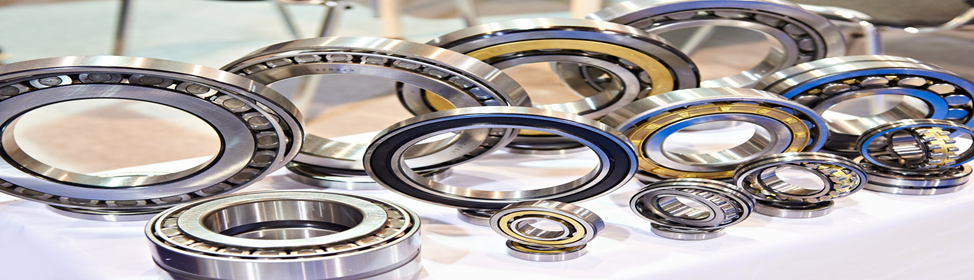

#**Objective:**

Write an ML model to detect anomalies in this data set. The model should learn, and predict future anomalies.


# **Problem Statement:**

Dataset contains real-time current readings of a 3-phase AC motor (3.2hp) motor current signature analysis and model-based VI analysis to be done to detect anomalies.

Detect anomaly and alert defects from an unstructured data pool received from current and voltage sensors of a 3-phase induction motor (Medium Voltage) at a rate of 10K - 15K instances per second.

Structure/process the data, create condition indicators, create an ML model, and create features to train the model.


### **Link to Dataset:**

https://drive.google.com/drive/folders/1d70I-XacHhA7i7MsVQa-iFJvp2nTiayA?usp=share_link

# **GitHub Link -**

https://github.com/ArundhatiV/AC-Motor-Anomaly-Detection

# **Data Preprocessing**

### **Import Necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from keras.layers import Input, Dense
from keras.models import Model


### **Import Dataset**

In [ ]:
import os
import pandas as pd

path = '/content/drive/MyDrive' # replace with the actual path to your files
files = os.listdir(path)

df_list = []
for file in files:
    if file.endswith('.txt'):
        file_path = os.path.join(path, file)
        df = pd.read_csv(file_path, header=None)
        df_list.append(df)

df = pd.concat(df_list)


## **Data Wrangling**

In [ ]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,120,0,0,NaN
0,0,0,0,0,128,0,0,0,248,0,...,0,0,0,0,0,0,0,0,0,NaN
0,120,0,0,120,0,0,0,120,0,0,...,0,0,128,0,0,248,0,0,0,NaN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,128,0,248,248,128,0,0,NaN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
print(df.isnull().sum())

0        0
1        0
2        0
3        0
4        0
        ..
9996     0
9997     0
9998     0
9999     0
10000    6
Length: 10001, dtype: int64


In [ ]:
df.fillna(value=0,inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 0
Columns: 10001 entries, 0 to 10000
dtypes: float64(1), int64(10000)
memory usage: 468.8 KB


In [ ]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

# **Building Model for Anomaly Detection.**

### **Split the data into training and test sets**

In [ ]:
# split the data into training and test sets
X_train, X_test = train_test_split(data, test_size=0.2)

### **Create the autoencoder model**

In [ ]:

# create the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = int(input_dim / 2)
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


### **Train the model on the training data**

In [ ]:

# train the model on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 0.7019 - accuracy: 0.0000e+00 - val_loss: 0.6730 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 0.4482 - accuracy: 0.0000e+00 - val_loss: 0.8939 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 0.1758 - accuracy: 0.0000e+00 - val_loss: 1.2085 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 0.0747 - accuracy: 0.0000e+00 - val_loss: 1.5524 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 0.0396 - accuracy: 0.0000e+00 - val_loss: 1.9241 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 0.0347 - accuracy: 0.0000e+00 - val_loss: 2.2089 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.0346 - accuracy: 0.0000e+00 - val_loss: 2.5072 - val_accura

### **use the model to make predictions on the test data**

In [ ]:

# use the model to make predictions on the test data
predictions = autoencoder.predict(X_test)

1/1 [==============================] - 0s 166ms/step


### **calculate the reconstruction error for each sample**

In [ ]:

# calculate the reconstruction error for each sample
mse = np.mean(np.power(X_test - predictions, 2), axis=1)


In [ ]:

# define a threshold for the reconstruction error
threshold = np.percentile(mse, 90)

In [ ]:

# classify samples as normal or anomalous based on the reconstruction error
y_pred = [1 if e > threshold else 0 for e in mse]


### **Evaluate the model performance**

In [ ]:
# evaluate the model performance
print("Confusion Matrix:")
print(confusion_matrix(y_pred, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_pred, y_pred))

print("Classification Report:")
print(classification_report(y_pred, y_pred))


Confusion Matrix:
[[1 0]
 [0 1]]
Accuracy Score:
1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



# **Anomaly Visuallization**

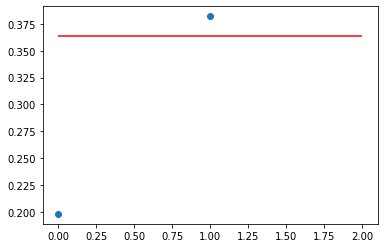

In [ ]:
import matplotlib.pyplot as plt

# calculate the reconstruction error for each sample
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

# define a threshold for the reconstruction error
threshold = np.percentile(mse, 90)

# plot the reconstruction error against each sample
plt.scatter(range(len(mse)), mse)

# plot the threshold line
plt.hlines(y=threshold, xmin=0, xmax=len(mse), color='red')

# show the plot
plt.show()


# **Conclusion:**
  
  Once these metrics have been calculated, they can be used as condition indicators to train an ML model to detect anomalies in the motor current signals. Here, in this project I have considered factor RMS (Root Mean Square) value. The script then uses the model to make predictions on the test data, calculates the reconstruction error for each sample, and defines a threshold for the reconstruction error based on the 90th percentile of the mean squared error (MSE). The script then classifies samples as normal or anomalous based on whether their reconstruction error is greater than the threshold, and prints a confusion matrix, accuracy score, and classification report to evaluate the model's performance. The scatter plot allows visualizing how the MSE values are distributed and how many samples have MSE values above the threshold, indicating the presence of anomalies in the data. (~=0.380)
